In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from datetime import datetime

In [3]:
chatterbox = pd.read_csv('employees.csv', low_memory=False)
attendance = pd.read_csv('train-attendance.csv', low_memory=False)
salary = pd.read_csv('train-salary.csv', low_memory=False)

In [4]:
salary.head()

,Employee_No,year,month,SiteNo,Area,Accomadation Allowance,Accommodation Allowance,Add. Allow. No Pay Deduction,Additional Allowance_0,Additional Allowance_2,...,WSL No of Full Worked Days,WSL No of Half Days,WSL OT 1.5,WSL OT Hours 1.5,WSL OT Rate,WSL Total Earning,WSL Total Working Days,WSLOther Allowance Rate,Working Days - Full,Working Days - Half Day
0,347,2021,7,1.0,Colombo,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,347,2021,8,1.0,Colombo,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,347,2021,9,1.0,Colombo,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,347,2021,10,1.0,Colombo,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,347,2021,11,1.0,Colombo,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
salary.shape

(9035, 109)

In [6]:
print(salary['Employee_No'].nunique())

1598


In [7]:
print(salary.columns.tolist())

['Employee_No', 'year', 'month', 'SiteNo', 'Area', 'Accomadation Allowance', 'Accommodation Allowance', 'Add. Allow. No Pay Deduction', 'Additional Allowance_0', 'Additional Allowance_2', 'Allow - Extra Working Hours', 'Attendance Allowance Rate', 'Attendance Allowance_0', 'Attendance Allowance_2', 'BRA1', 'BRA1 Amount', 'BRA1WSL', 'BRA2', 'BRA2 Amount', 'BRA2WSL', 'Basic Day Rate', 'Basic Rate for EPF', 'Basic Rate_2', 'Basic Rate_3', 'Basic Salary for EPF', 'Basic Salary_0', 'Basic Salary_2', 'Basic per Day', 'EPF Employee 8%', 'EPF Employer 12%', 'EPF Staff No Pay Full Day', 'EPF Staff No Pay Half Day', 'EPF staff Halfdays', 'EPF staff full workdays', 'ETF Employer 3%', 'Ex Work Hours Allownace', 'Fixed Amount', 'Fixed OT Entitlement', 'Fixed OT Hours', 'Hard Ship Allowance Rate', 'Hard Ship Allowance_0', 'Hard Ship Allowance_2', 'Hard ship Allowance Rate', 'Leave Leave Full Day', 'Leave Leave Halfday', 'Lieu Leave', 'Meal Allowance', 'Month Day Count', 'Net Salary', 'No Pay', 'No P

In [8]:
salary[['Salary Advance', 'OT Hours', 'No of Half Days', 'No of Full Worked Days', 'Net Salary', 'Leave Leave Full Day', 'Leave Leave Halfday']]

,Salary Advance,OT Hours,No of Half Days,No of Full Worked Days,Net Salary,Leave Leave Full Day,Leave Leave Halfday
0,0.0,16.35,0.0,0.0,35107.43,0.0,0.0
1,0.0,4.81,0.0,0.0,33051.81,0.0,0.0
2,0.0,21.95,0.0,0.0,0.00,0.0,0.0
3,0.0,10.25,0.0,0.0,34020.83,0.0,0.0
4,0.0,14.25,0.0,0.0,34733.35,0.0,0.0
...,...,...,...,...,...,...,...
9030,0.0,4.25,0.0,14.0,24310.00,0.0,0.0
9031,0.0,4.25,0.0,15.0,25985.00,0.0,0.0
9032,0.0,5.00,0.0,15.0,26075.00,0.0,0.0
9033,0.0,0.00,0.0,0.0,12933.33,0.0,0.0


In [9]:
print(salary.duplicated().any())

False


In [12]:
display(salary.isna().sum())

Employee_No                 0
year                        0
month                       0
SiteNo                     45
Area                        0
                           ..
WSL Total Earning           0
WSL Total Working Days      0
WSLOther Allowance Rate     0
Working Days - Full         0
Working Days - Half Day     0
Length: 109, dtype: int64

In [75]:
salary.dtypes

Employee_No                  int64
year                         int64
month                        int64
SiteNo                     float64
Area                        object
                            ...   
WSL Total Earning          float64
WSL Total Working Days     float64
WSLOther Allowance Rate    float64
Working Days - Full        float64
Working Days - Half Day    float64
Length: 109, dtype: object

In [76]:
salary_filtered = salary[['Employee_No', 'Salary Advance', 'OT Hours', 'No of Half Days', 'No of Full Worked Days', 'Net Salary', 'Leave Leave Full Day', 'Leave Leave Halfday']]
salary_filtered.head()

,Employee_No,Salary Advance,OT Hours,No of Half Days,No of Full Worked Days,Net Salary,Leave Leave Full Day,Leave Leave Halfday
0,347,0.0,16.35,0.0,0.0,35107.43,0.0,0.0
1,347,0.0,4.81,0.0,0.0,33051.81,0.0,0.0
2,347,0.0,21.95,0.0,0.0,0.00,0.0,0.0
3,347,0.0,10.25,0.0,0.0,34020.83,0.0,0.0
4,347,0.0,14.25,0.0,0.0,34733.35,0.0,0.0


In [77]:
salary = salary_filtered.groupby('Employee_No').agg({'Salary Advance':['max', 'min', 'mean'], 'OT Hours':['max', 'min', 'mean'], 'No of Half Days': ['max', 'min', 'mean'], 'No of Full Worked Days': ['max', 'min', 'mean'], 'Net Salary': ['max', 'min', 'mean'], 'Leave Leave Full Day': ['max', 'min', 'mean'], 'Leave Leave Halfday': ['max', 'min', 'mean']})
display(salary.head())

_columns_labels = []
_columns = salary.columns.tolist()
for i in range(len(_columns)):
    _columns_labels.append(_columns[i][1] + "_" + _columns[i][0])

print(_columns_labels)

salary = salary.reset_index(level=[0])

columns_labels = ['Employee_No'] + _columns_labels

salary.columns = columns_labels

display(salary.head())

Salary Advance                  OT Hours                     \
                       max  min        mean      max    min        mean   
Employee_No                                                               
347                    0.0  0.0    0.000000    27.75   0.75   12.450556   
348                 5000.0  0.0  277.777778   193.75  11.50  114.636111   
351                    0.0  0.0    0.000000    10.68   1.00    5.726667   
352                    0.0  0.0    0.000000   100.60   0.00   42.830588   
354                    0.0  0.0    0.000000   180.00   4.23  124.582353   

            No of Half Days           No of Full Worked Days  ...       \
                        max  min mean                    max  ... mean   
Employee_No                                                   ...        
347                     0.0  0.0  0.0                    0.0  ...  0.0   
348                     0.0  0.0  0.0                    0.0  ...  0.0   
351                     0.0  0.0  0.0                    0.0  ...  0.0   
352                     0.0  0.0  0.0                    0.0  ...  0.0   
354                     0.0  0.0  0.0                    0.0  ...  0.0   

            Net Salary                         Leave Leave Full Day       \
                   max       min          mean                  max  min   
Employee_No                                                                
347           37138.11      0.00  32317.488333                  0.0  0.0   
348           89251.50      0.00  55814.944444                  0.0  0.0   
351           48899.50  40263.55  45578.643333                  0.0  0.0   
352           45361.06  14058.03  33220.818235                  4.0  0.0   
354           82640.00  35881.49  66650.151765                  0.0  0.0   

                      Leave Leave Halfday                 
                 mean                 max  min      mean  
Employee_No                                               
347          0.000000                 0.0  0.0  0.000000  
348          0.000000                 0.0  0.0  0.000000  
351          0.000000                 0.0  0.0  0.000000  
352          0.529412                 3.0  0.0  0.529412  
354          0.000000                 0.0  0.0  0.000000  

[5 rows x 21 columns]

['max_Salary Advance', 'min_Salary Advance', 'mean_Salary Advance', 'max_OT Hours', 'min_OT Hours', 'mean_OT Hours', 'max_No of Half Days', 'min_No of Half Days', 'mean_No of Half Days', 'max_No of Full Worked Days', 'min_No of Full Worked Days', 'mean_No of Full Worked Days', 'max_Net Salary', 'min_Net Salary', 'mean_Net Salary', 'max_Leave Leave Full Day', 'min_Leave Leave Full Day', 'mean_Leave Leave Full Day', 'max_Leave Leave Halfday', 'min_Leave Leave Halfday', 'mean_Leave Leave Halfday']


,Employee_No,max_Salary Advance,min_Salary Advance,mean_Salary Advance,max_OT Hours,min_OT Hours,mean_OT Hours,max_No of Half Days,min_No of Half Days,mean_No of Half Days,...,mean_No of Full Worked Days,max_Net Salary,min_Net Salary,mean_Net Salary,max_Leave Leave Full Day,min_Leave Leave Full Day,mean_Leave Leave Full Day,max_Leave Leave Halfday,min_Leave Leave Halfday,mean_Leave Leave Halfday
0,347,0.0,0.0,0.000000,27.75,0.75,12.450556,0.0,0.0,0.0,...,0.0,37138.11,0.00,32317.488333,0.0,0.0,0.000000,0.0,0.0,0.000000
1,348,5000.0,0.0,277.777778,193.75,11.50,114.636111,0.0,0.0,0.0,...,0.0,89251.50,0.00,55814.944444,0.0,0.0,0.000000,0.0,0.0,0.000000
2,351,0.0,0.0,0.000000,10.68,1.00,5.726667,0.0,0.0,0.0,...,0.0,48899.50,40263.55,45578.643333,0.0,0.0,0.000000,0.0,0.0,0.000000
3,352,0.0,0.0,0.000000,100.60,0.00,42.830588,0.0,0.0,0.0,...,0.0,45361.06,14058.03,33220.818235,4.0,0.0,0.529412,3.0,0.0,0.529412
4,354,0.0,0.0,0.000000,180.00,4.23,124.582353,0.0,0.0,0.0,...,0.0,82640.00,35881.49,66650.151765,0.0,0.0,0.000000,0.0,0.0,0.000000


In [78]:
attendance.head()

,id,project_code,date,out_date,Employee_No,in_time,out_time,Hourly_Time,Shift_Start,Shift_End
0,280220,100.0,2/1/2021,2/1/2021,1272,8:30:00,17:00:00,8.5,8:30:00,17:00:00
1,280307,1.0,2/1/2021,2/1/2021,1539,8:30:00,17:00:00,8.5,8:30:00,17:00:00
2,280312,1.0,2/1/2021,2/1/2021,1540,7:45:00,17:00:00,9.25,8:30:00,17:00:00
3,280385,100.0,2/1/2021,2/1/2021,1273,8:00:00,18:00:00,10,8:30:00,17:00:00
4,322526,1.0,2/1/2021,2/1/2021,573,23:22:28,23:22:28,0,8:30:00,17:00:00


In [79]:
attendance.shape

(224057, 10)

In [80]:
attendance.columns

Index(['id', 'project_code', 'date', 'out_date', 'Employee_No', 'in_time',
       'out_time', 'Hourly_Time', 'Shift_Start', 'Shift_End'],
      dtype='object')

In [81]:
attendance.dtypes

id                int64
project_code    float64
date             object
out_date         object
Employee_No       int64
in_time          object
out_time         object
Hourly_Time      object
Shift_Start      object
Shift_End        object
dtype: object

In [82]:
print(attendance['id'].is_unique)

True


In [83]:
print('Employee No : ', attendance['Employee_No'].nunique())
print('Shift Start : ', attendance['Shift_Start'].nunique())
print('Shift End : ', attendance['Shift_End'].nunique())

print('Shift Start : ', attendance['Shift_Start'].unique())
print('Shift End : ', attendance['Shift_End'].unique())

Employee No :  1883
Shift Start :  9
Shift End :  9
Shift Start :  ['8:30:00' '8:00:00' '0:00:00' '7:00:00' '18:00:00' '7:30:00' '6:00:00'
 '19:00:00' '17:00:00']
Shift End :  ['17:00:00' '13:30:00' '0:00:00' '6:59:00' '7:00:00' '6:00:00' '18:00:00'
 '22:00:00' '8:00:00']


In [84]:
attendance.isna().sum()

id              0
project_code    0
date            0
out_date        0
Employee_No     0
in_time         0
out_time        0
Hourly_Time     0
Shift_Start     0
Shift_End       0
dtype: int64

In [85]:
print((attendance['Hourly_Time'] == '\\N').sum())
print((attendance['Hourly_Time'] == '0').sum())

15
6725


In [86]:
attendance['Shift_Start_Minutes'] = attendance['Shift_Start'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
attendance['Shift_End_Minutes'] = attendance['Shift_End'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
attendance['in_time_Minutes'] = attendance['in_time'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
attendance['out_time_Minutes'] = attendance['out_time'].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
attendance['Time_Minutes'] = attendance['out_time_Minutes'] - attendance['in_time_Minutes']

print(attendance['Shift_Start_Minutes'].isna().sum())
print(attendance['Shift_End_Minutes'].isna().sum())

display(attendance.head())

0
0


,id,project_code,date,out_date,Employee_No,in_time,out_time,Hourly_Time,Shift_Start,Shift_End,Shift_Start_Minutes,Shift_End_Minutes,in_time_Minutes,out_time_Minutes,Time_Minutes
0,280220,100.0,2/1/2021,2/1/2021,1272,8:30:00,17:00:00,8.5,8:30:00,17:00:00,510,1020,510,1020,510
1,280307,1.0,2/1/2021,2/1/2021,1539,8:30:00,17:00:00,8.5,8:30:00,17:00:00,510,1020,510,1020,510
2,280312,1.0,2/1/2021,2/1/2021,1540,7:45:00,17:00:00,9.25,8:30:00,17:00:00,510,1020,465,1020,555
3,280385,100.0,2/1/2021,2/1/2021,1273,8:00:00,18:00:00,10,8:30:00,17:00:00,510,1020,480,1080,600
4,322526,1.0,2/1/2021,2/1/2021,573,23:22:28,23:22:28,0,8:30:00,17:00:00,510,1020,1402,1402,0


In [87]:
attendance = attendance.drop(['id', 'project_code', 'date', 'out_date', 'in_time', 'out_time', 'Hourly_Time', 'Shift_Start', 'Shift_End'], axis=1)

attendance.head()

,Employee_No,Shift_Start_Minutes,Shift_End_Minutes,in_time_Minutes,out_time_Minutes,Time_Minutes
0,1272,510,1020,510,1020,510
1,1539,510,1020,510,1020,510
2,1540,510,1020,465,1020,555
3,1273,510,1020,480,1080,600
4,573,510,1020,1402,1402,0


In [88]:
print((attendance['Time_Minutes'] == 0).sum())

6923


In [89]:
attendance = attendance[attendance['Time_Minutes'] != 0]
print(attendance.shape)
print('Employee No : ', attendance['Employee_No'].nunique())
print('Shift_Start_Minutes', sorted(attendance['Shift_Start_Minutes'].unique()))
print('Shift_End_Minutes', sorted(attendance['Shift_End_Minutes'].unique()))

(217134, 6)
Employee No :  1870
Shift_Start_Minutes [0, 360, 420, 450, 480, 510, 1020, 1080, 1140]
Shift_End_Minutes [0, 360, 419, 420, 480, 810, 1020, 1080, 1320]


In [90]:
attendance.loc[attendance['Shift_End_Minutes'] == 419, 'Shift_End_Minutes'] = 420
print('Shift_End_Minutes', sorted(attendance['Shift_End_Minutes'].unique()))

Shift_End_Minutes [0, 360, 420, 480, 810, 1020, 1080, 1320]


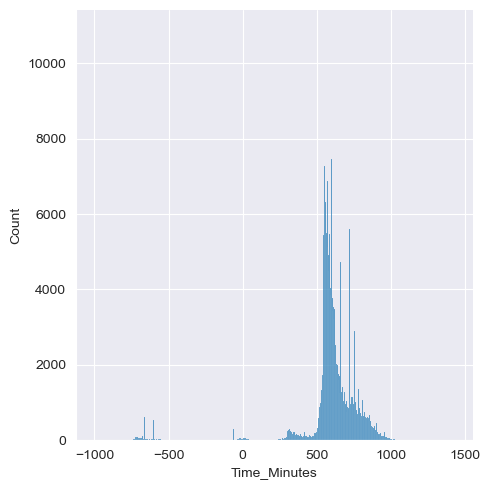

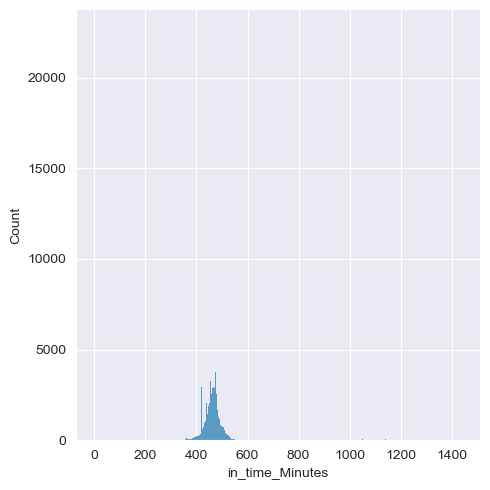

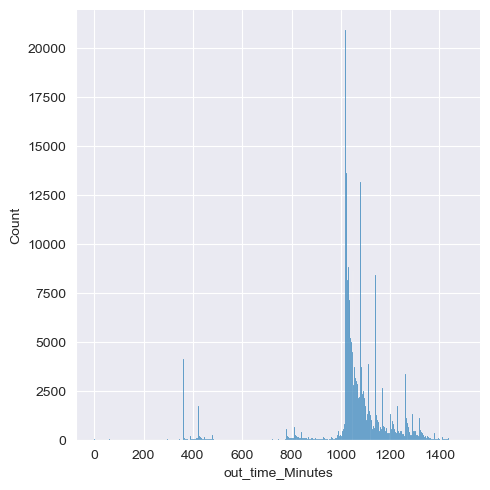

In [91]:
sns.displot(attendance, x='Time_Minutes')
plt.show()

sns.displot(attendance, x='in_time_Minutes')
plt.show()

sns.displot(attendance, x='out_time_Minutes')
plt.show()

In [92]:
OneHotEncoders = {}

attendance = attendance.reset_index(drop=True)

for j in ['Shift_Start_Minutes', 'Shift_End_Minutes']:
    ohe = OneHotEncoder()
    feature_array = ohe.fit_transform(attendance[[j]]).toarray()
    feature_labels = np.array(ohe.categories_).ravel()
    labels = []
    for i in range(len(feature_labels)):
        if j == 'Shift_Start_Minutes':
            labels.append('start_' + str(int(feature_labels[i])))
        else:
            labels.append('end_' + str(int(feature_labels[i])))
    features = pd.DataFrame(feature_array, columns=labels)
    attendance = pd.concat([attendance, features], axis=1)

    OneHotEncoders['attendance_' + j] = ohe

display(attendance.head())
print(attendance.shape)
print(attendance.columns)

,Employee_No,Shift_Start_Minutes,Shift_End_Minutes,in_time_Minutes,out_time_Minutes,Time_Minutes,start_0,start_360,start_420,start_450,...,start_1080,start_1140,end_0,end_360,end_420,end_480,end_810,end_1020,end_1080,end_1320
0,1272,510,1020,510,1020,510,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1539,510,1020,510,1020,510,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1540,510,1020,465,1020,555,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1273,510,1020,480,1080,600,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,572,510,1020,559,1057,498,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


(217134, 23)
Index(['Employee_No', 'Shift_Start_Minutes', 'Shift_End_Minutes',
       'in_time_Minutes', 'out_time_Minutes', 'Time_Minutes', 'start_0',
       'start_360', 'start_420', 'start_450', 'start_480', 'start_510',
       'start_1020', 'start_1080', 'start_1140', 'end_0', 'end_360', 'end_420',
       'end_480', 'end_810', 'end_1020', 'end_1080', 'end_1320'],
      dtype='object')


In [93]:
attendance = attendance.groupby('Employee_No').agg({'in_time_Minutes':['mean'], 'out_time_Minutes':['median'],
                                                    'Time_Minutes':['median'], 'start_0':['sum'],
                                                   'start_360':['sum'], 'start_420':['sum'], 'start_450':['sum'], 'start_480':['sum'], 'start_510':['sum'],
                                                   'start_1020':['sum'], 'start_1080':['sum'], 'start_1140':['sum'], 'end_0':['sum'], 'end_360':['sum'], 'end_420':['sum'],
                                                   'end_480':['sum'], 'end_810':['sum'], 'end_1020':['sum'], 'end_1080':['sum'], 'end_1320':['sum']})

attendance = attendance.reset_index(level=[0])

attendance.columns = ['Employee_No', 'in_time_Minutes', 'out_time_Minutes', 'Time_Minutes', 'start_0',
                      'start_360', 'start_420', 'start_450', 'start_480', 'start_510',
                      'start_1020', 'start_1080', 'start_1140', 'end_0', 'end_360', 'end_420',
                      'end_480', 'end_810', 'end_1020', 'end_1080', 'end_1320']
display(attendance.head())
print(attendance.shape)
print(attendance.columns)

,Employee_No,in_time_Minutes,out_time_Minutes,Time_Minutes,start_0,start_360,start_420,start_450,start_480,start_510,...,start_1080,start_1140,end_0,end_360,end_420,end_480,end_810,end_1020,end_1080,end_1320
0,347,518.991416,1050.0,530.0,1.0,0.0,0.0,0.0,0.0,465.0,...,0.0,0.0,1.0,0.0,0.0,0.0,61.0,404.0,0.0,0.0
1,348,459.008316,1136.0,638.0,27.0,0.0,0.0,0.0,0.0,454.0,...,0.0,0.0,27.0,0.0,0.0,0.0,68.0,386.0,0.0,0.0
2,349,537.375000,1086.0,553.5,0.0,0.0,0.0,0.0,0.0,64.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,55.0,0.0,0.0
3,351,509.446043,1020.0,523.0,0.0,0.0,0.0,0.0,0.0,139.0,...,0.0,0.0,0.0,0.0,0.0,0.0,19.0,120.0,0.0,0.0
4,352,479.323741,1090.0,619.0,38.0,0.0,0.0,0.0,464.0,54.0,...,0.0,0.0,38.0,0.0,0.0,0.0,54.0,464.0,0.0,0.0


(1870, 21)
Index(['Employee_No', 'in_time_Minutes', 'out_time_Minutes', 'Time_Minutes',
       'start_0', 'start_360', 'start_420', 'start_450', 'start_480',
       'start_510', 'start_1020', 'start_1080', 'start_1140', 'end_0',
       'end_360', 'end_420', 'end_480', 'end_810', 'end_1020', 'end_1080',
       'end_1320'],
      dtype='object')


In [94]:
chatterbox

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth
0,347,6,Myrl Bechtelar MD,Mr,Male,1,Married,24,12/8/1993,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1965
1,348,33,Francis Mraz,Mr,Male,1,Married,24,3/14/1995,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1973
2,349,53,Mr Emmet Blick Jr,Mr,Male,1,Married,23,1/27/1988,6/28/2021,Inactive,6/28/2021,\N,\N,Staff,Permanant,Buddhist,Account Clerk,1974
3,351,77,Mr Nelson Braun PhD,Ms,Female,4,Married,40,10/1/1999,1/31/2022,Inactive,1/31/2022,\N,\N,Staff,Permanant,Catholic,Purchasing Officer,1974
4,352,88,Maximillian Hand,Mr,Male,1,Married,7,1/26/2001,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Store Keeper,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,2836,5434,Janis Borer Jr,Ms,Female,1,Single,17,11/1/2022,12/22/2022,Inactive,12/22/2022,\N,\N,Staff,Contarct Basis,Buddhist,Account Executive,1993
993,2890,5479,Delphia Haley,Mr,Male,1,Single,8,11/21/2022,0000-00-00,Active,0000-00-00,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1994
994,2972,5480,Lance Stanton,Mr,Male,1,Single,201,12/5/2022,\N,Active,\N,\N,\N,Staff,Contarct Basis,Buddhist,Software Developer,1997
995,2973,5481,Chauncey Reilly,Mr,Male,1,Single,8,12/8/2022,0000-00-00,Active,0000-00-00,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1990


In [95]:
chatterbox.shape

(997, 19)

In [96]:
Cols = chatterbox.columns.tolist()
print(Cols)

['Employee_No', 'Employee_Code', 'Name', 'Title', 'Gender', 'Religion_ID', 'Marital_Status', 'Designation_ID', 'Date_Joined', 'Date_Resigned', 'Status', 'Inactive_Date', 'Reporting_emp_1', 'Reporting_emp_2', 'Employment_Category', 'Employment_Type', 'Religion', 'Designation', 'Year_of_Birth']


In [97]:
print(chatterbox['Employee_No'].is_unique)
print(chatterbox.duplicated().any())

True
False


In [98]:
chatterbox.dtypes

Employee_No             int64
Employee_Code           int64
Name                   object
Title                  object
Gender                 object
Religion_ID             int64
Marital_Status         object
Designation_ID          int64
Date_Joined            object
Date_Resigned          object
Status                 object
Inactive_Date          object
Reporting_emp_1        object
Reporting_emp_2        object
Employment_Category    object
Employment_Type        object
Religion               object
Designation            object
Year_of_Birth          object
dtype: object

In [99]:
for col in Cols:
    print(f'{col} : ', chatterbox[col].nunique())

Employee_No :  997
Employee_Code :  997
Name :  997
Title :  3
Gender :  2
Religion_ID :  4
Marital_Status :  2
Designation_ID :  129
Date_Joined :  549
Date_Resigned :  256
Status :  2
Inactive_Date :  352
Reporting_emp_1 :  24
Reporting_emp_2 :  1
Employment_Category :  3
Employment_Type :  2
Religion :  4
Designation :  129
Year_of_Birth :  60


In [100]:
chatterbox.isna().sum()

Employee_No             0
Employee_Code           0
Name                    0
Title                   0
Gender                  0
Religion_ID             0
Marital_Status         67
Designation_ID          0
Date_Joined             0
Date_Resigned           0
Status                  0
Inactive_Date           0
Reporting_emp_1         0
Reporting_emp_2         0
Employment_Category     0
Employment_Type         0
Religion                0
Designation             0
Year_of_Birth           0
dtype: int64

In [101]:
print((chatterbox['Year_of_Birth'] == "'0000'").sum())
print((chatterbox['Date_Joined'] == "\\N").sum())
print((chatterbox['Date_Resigned'] == "\\N").sum())
print((chatterbox['Inactive_Date'] == "\\N").sum())
print((chatterbox['Date_Joined'] == "0000-00-00").sum())
print((chatterbox['Date_Resigned'] == "0000-00-00").sum())
print((chatterbox['Inactive_Date'] == "0000-00-00").sum())

103
0
273
128
0
183
105


In [102]:
print('Marital_Status : ', chatterbox['Marital_Status'].unique())
print('Title : ', chatterbox['Title'].unique())
print('Gender : ', chatterbox['Gender'].unique())
print('Religion_ID : ', chatterbox['Religion_ID'].unique())

Marital_Status :  ['Married' 'Single' nan]
Title :  ['Mr' 'Ms' 'Miss']
Gender :  ['Male' 'Female']
Religion_ID :  [1 4 3 5]


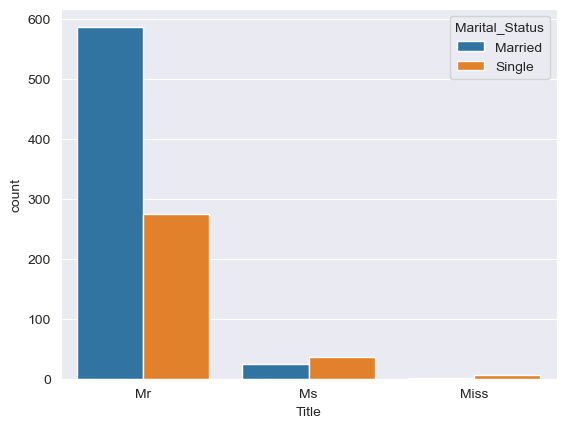

In [103]:
sns.countplot(data=chatterbox, x='Title', hue='Marital_Status')
plt.show()

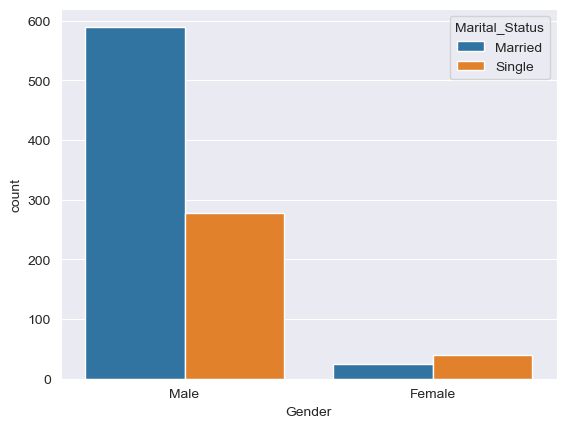

In [104]:
sns.countplot(data=chatterbox, x='Gender', hue='Marital_Status')
plt.show()

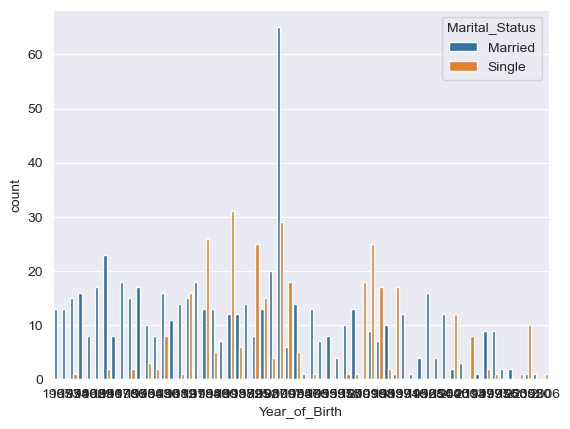

In [105]:
sns.countplot(data=chatterbox, x='Year_of_Birth', hue='Marital_Status')
plt.show()

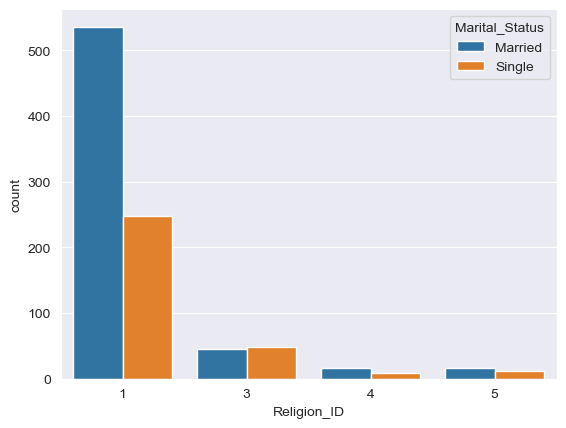

In [106]:
sns.countplot(data=chatterbox, x='Religion_ID', hue='Marital_Status')
plt.show()

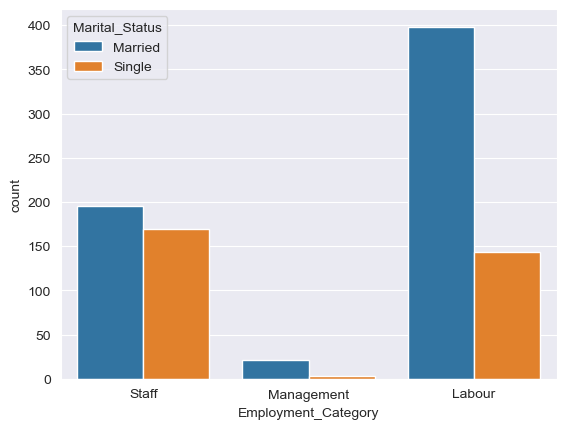

In [107]:
sns.countplot(data=chatterbox, x='Employment_Category', hue='Marital_Status')
plt.show()

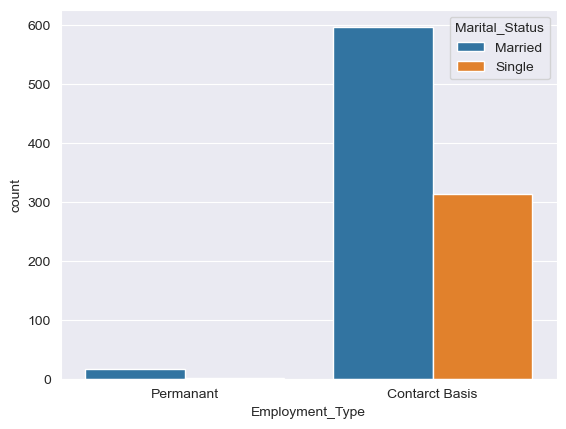

In [108]:
sns.countplot(data=chatterbox, x='Employment_Type', hue='Marital_Status')
plt.show()

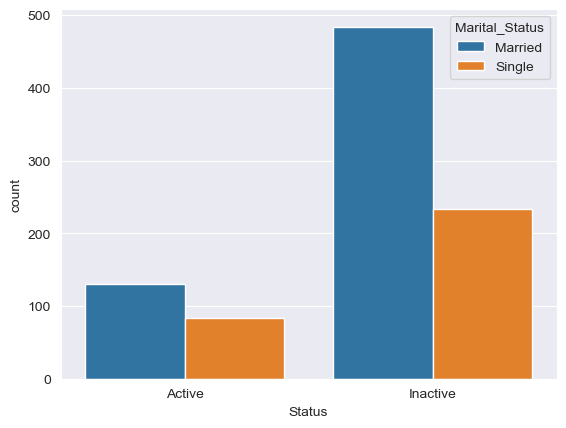

In [109]:
sns.countplot(data=chatterbox, x='Status', hue='Marital_Status')
plt.show()

In [110]:
partial = chatterbox[chatterbox['Year_of_Birth'] == "'0000'"]
print(partial['Marital_Status'].isna().sum())

partial = chatterbox[chatterbox['Status'] == 'Inactive']
print(partial['Marital_Status'].notna().sum())

9
717


In [111]:
_chatterbox = chatterbox.copy()
_chatterbox = _chatterbox.drop(['Employee_Code', 'Name', 'Religion_ID', 'Designation_ID', 'Date_Resigned', 'Inactive_Date', 'Reporting_emp_1', 'Reporting_emp_2'], axis=1)
display(_chatterbox.head())
print(_chatterbox.shape)
print(_chatterbox.columns)

,Employee_No,Title,Gender,Marital_Status,Date_Joined,Status,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth
0,347,Mr,Male,Married,12/8/1993,Active,Staff,Permanant,Buddhist,Driver,1965
1,348,Mr,Male,Married,3/14/1995,Active,Staff,Permanant,Buddhist,Driver,1973
2,349,Mr,Male,Married,1/27/1988,Inactive,Staff,Permanant,Buddhist,Account Clerk,1974
3,351,Ms,Female,Married,10/1/1999,Inactive,Staff,Permanant,Catholic,Purchasing Officer,1974
4,352,Mr,Male,Married,1/26/2001,Active,Staff,Permanant,Buddhist,Store Keeper,1980


(997, 11)
Index(['Employee_No', 'Title', 'Gender', 'Marital_Status', 'Date_Joined',
       'Status', 'Employment_Category', 'Employment_Type', 'Religion',
       'Designation', 'Year_of_Birth'],
      dtype='object')


In [112]:
_chatterbox['Date_Joined_Days'] = np.nan
for index, row in _chatterbox.iterrows():
    date = row['Date_Joined'].split('/')
    date = datetime(int(date[2]), int(date[0]), int(date[1]))
    _chatterbox.at[index, 'Date_Joined_Days'] = int(date.timestamp() / 86400)

ohe = OneHotEncoder()
feature_array = ohe.fit_transform(_chatterbox[['Title', 'Gender', 'Status', 'Employment_Category', 'Employment_Type', 'Religion', 'Designation']]).toarray()
features = pd.DataFrame(feature_array, columns=ohe.get_feature_names_out())
_chatterbox = pd.concat([_chatterbox, features], axis=1)

OneHotEncoders['chatterbox'] = ohe

_chatterbox = _chatterbox.drop(['Title', 'Gender', 'Date_Joined',
                                'Status', 'Employment_Category', 'Employment_Type', 'Religion',
                                'Designation'], axis=1)

display(_chatterbox.head())
print(_chatterbox.shape)

,Employee_No,Marital_Status,Year_of_Birth,Date_Joined_Days,Title_Miss,Title_Mr,Title_Ms,Gender_Female,Gender_Male,Status_Active,...,Designation_Trainee Engineer,Designation_Trainee Purchasing Officer,Designation_Trainee QS,Designation_Trainee Safety Officer,Designation_Trainee Technical Officer,Designation_Transport Assistant,Designation_Transport Officer,Designation_Unskilled Labor,Designation_Wacher,Designation_Welder
0,347,Married,1965,8741.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,348,Married,1973,9202.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,349,Married,1974,6599.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,351,Married,1974,10864.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,352,Married,1980,11347.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(997, 149)


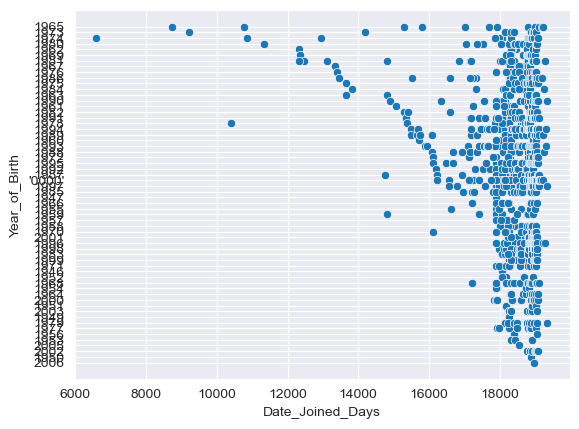

In [113]:
sns.scatterplot(_chatterbox, x='Date_Joined_Days', y='Year_of_Birth')
plt.show()

In [114]:
def checkTitleGenderAndMaritalStatus():
    print(chatterbox.loc[((chatterbox['Title'] == 'Ms') | (chatterbox['Title'] == 'Miss')) & (chatterbox['Gender'] == 'Male'), 'Name'].size)
    print(chatterbox.loc[((chatterbox['Title'] == 'Ms') | (chatterbox['Title'] == 'Miss')) & (chatterbox['Gender'] == 'Male'), 'Name'])
    print(chatterbox.loc[((chatterbox['Title'] == 'Ms') | (chatterbox['Title'] == 'Miss')) & (chatterbox['Gender'] == 'Male') & (chatterbox['Marital_Status'] == 'Married'), 'Name'].size)
    print(chatterbox.loc[((chatterbox['Title'] == 'Ms') | (chatterbox['Title'] == 'Miss')) & (chatterbox['Gender'] == 'Male') & (chatterbox['Marital_Status'] == 'Married'), 'Name'])
    print(chatterbox.loc[((chatterbox['Title'] == 'Ms') | (chatterbox['Title'] == 'Miss')) & (chatterbox['Gender'] == 'Male') & (chatterbox['Marital_Status'] == 'Single'), 'Name'].size)
    print(chatterbox.loc[((chatterbox['Title'] == 'Ms') | (chatterbox['Title'] == 'Miss')) & (chatterbox['Gender'] == 'Male') & (chatterbox['Marital_Status'] == 'Single'), 'Name'])
    print('\n\n')

    print(chatterbox.loc[(chatterbox['Title'] == 'Mr') & (chatterbox['Gender'] == 'Female'), 'Name'].size)
    print(chatterbox.loc[(chatterbox['Title'] == 'Mr') & (chatterbox['Gender'] == 'Female'), 'Name'])
    print(chatterbox.loc[(chatterbox['Title'] == 'Mr') & (chatterbox['Gender'] == 'Female') & (chatterbox['Marital_Status'] == 'Single'), 'Name'].size)
    print(chatterbox.loc[(chatterbox['Title'] == 'Mr') & (chatterbox['Gender'] == 'Female') & (chatterbox['Marital_Status'] == 'Single'), 'Name'])
    print(chatterbox.loc[(chatterbox['Title'] == 'Mr') & (chatterbox['Gender'] == 'Female') & (chatterbox['Marital_Status'] == 'Married'), 'Name'].size)
    print(chatterbox.loc[(chatterbox['Title'] == 'Mr') & (chatterbox['Gender'] == 'Female') & (chatterbox['Marital_Status'] == 'Married'), 'Name'])
    print('\n\n')

    print(chatterbox.loc[(chatterbox['Title'] == 'Miss') & (chatterbox['Marital_Status'] == 'Married') & (chatterbox['Gender'] == 'Male'), 'Name'].size)
    print(chatterbox.loc[(chatterbox['Title'] == 'Miss') & (chatterbox['Marital_Status'] == 'Married') & (chatterbox['Gender'] == 'Male'), 'Name'])
    print(chatterbox.loc[(chatterbox['Title'] == 'Miss') & (chatterbox['Marital_Status'] == 'Married') & (chatterbox['Gender'] == 'Female'), 'Name'].size)
    print(chatterbox.loc[(chatterbox['Title'] == 'Miss') & (chatterbox['Marital_Status'] == 'Married') & (chatterbox['Gender'] == 'Female'), 'Name'])
    print(chatterbox.loc[(chatterbox['Title'] == 'Miss') & (chatterbox['Marital_Status'] == 'Married'), 'Name'].size)
    print(chatterbox.loc[(chatterbox['Title'] == 'Miss') & (chatterbox['Marital_Status'] == 'Married'), 'Name'])
    print('\n\n')

    print(chatterbox.loc[(chatterbox['Title'] == 'Miss') & (chatterbox['Marital_Status'] == np.nan), 'Name'].size)

checkTitleGenderAndMaritalStatus()

10
235            Leif Konopelski
611                 Hulda Wolf
614            Braxton Volkman
624               Sage Lebsack
646             Elmira Gleason
681          Prof Lonie O'Hara
693           Oceane Krajcik I
783         Loyce Botsford DDS
886    Miss Clementina Kilback
904               Clovis Lakin
Name: Name, dtype: object
3
614     Braxton Volkman
624        Sage Lebsack
693    Oceane Krajcik I
Name: Name, dtype: object
7
235            Leif Konopelski
611                 Hulda Wolf
646             Elmira Gleason
681          Prof Lonie O'Hara
783         Loyce Botsford DDS
886    Miss Clementina Kilback
904               Clovis Lakin
Name: Name, dtype: object



4
118          Ilene Goyette
149        Luna Harris DDS
577     Mrs Mallie Torp IV
823    Ernest Dietrich DVM
Name: Name, dtype: object
4
118          Ilene Goyette
149        Luna Harris DDS
577     Mrs Mallie Torp IV
823    Ernest Dietrich DVM
Name: Name, dtype: object
0
Series([], Name: Name, dtype: object)



# Imputing 'Marital_Status' of employee.csv

In [115]:
chatterbox.loc[((chatterbox['Title'] == 'Ms') | (chatterbox['Title'] == 'Miss')) & (chatterbox['Gender'] == 'Male'), 'Title'] = 'Mr'
chatterbox.loc[(chatterbox['Title'] == 'Mr') & (chatterbox['Gender'] == 'Female') & (chatterbox['Marital_Status'] == 'Single'), 'Title'] = 'Miss'
chatterbox.loc[(chatterbox['Title'] == 'Mr') & (chatterbox['Gender'] == 'Female') & (chatterbox['Marital_Status'] == 'Married'), 'Title'] = 'Ms'
chatterbox.loc[(chatterbox['Title'] == 'Mr') & (chatterbox['Gender'] == 'Female') & ((chatterbox['Marital_Status'] != 'Married') | (chatterbox['Marital_Status'] != 'Single')), 'Title'] = 'Ms'
chatterbox.loc[(chatterbox['Title'] == 'Miss') & (chatterbox['Gender'] == 'Female') & (chatterbox['Marital_Status'] == 'Married'), 'Title'] = 'Ms'

In [116]:
checkTitleGenderAndMaritalStatus()

0
Series([], Name: Name, dtype: object)
0
Series([], Name: Name, dtype: object)
0
Series([], Name: Name, dtype: object)



0
Series([], Name: Name, dtype: object)
0
Series([], Name: Name, dtype: object)
0
Series([], Name: Name, dtype: object)



0
Series([], Name: Name, dtype: object)
0
Series([], Name: Name, dtype: object)
0
Series([], Name: Name, dtype: object)



0


In [117]:
final = _chatterbox.copy()

# final = pd.merge(_chatterbox, salary, how='left', on=['Employee_No'])
# display(final.head())
# print(final.shape)

# final = pd.merge(_chatterbox, attendance, how='left', on=['Employee_No'])
# display(final.head())
# print(final.shape)

In [118]:
final.isna().sum()

Employee_No                         0
Marital_Status                     67
Year_of_Birth                       0
Date_Joined_Days                    0
Title_Miss                          0
                                   ..
Designation_Transport Assistant     0
Designation_Transport Officer       0
Designation_Unskilled Labor         0
Designation_Wacher                  0
Designation_Welder                  0
Length: 149, dtype: int64

In [119]:
# final[salary.columns] = final[salary.columns].fillna(final[salary.columns].median())
# display(final.head())

In [120]:
# final.isna().sum()

In [121]:
LabelEncoders = {}
le = LabelEncoder()
original = final.copy()
mask = final.isnull()
final.Marital_Status = le.fit_transform(final.Marital_Status)
final = final.where(~mask, original)
LabelEncoders['Marital_Status'] = le

final.loc[final['Year_of_Birth'] == "'0000'", 'Year_of_Birth'] = '0'
final['Year_of_Birth'] = final['Year_of_Birth'].astype('int64')

display(final.head())

,Employee_No,Marital_Status,Year_of_Birth,Date_Joined_Days,Title_Miss,Title_Mr,Title_Ms,Gender_Female,Gender_Male,Status_Active,...,Designation_Trainee Engineer,Designation_Trainee Purchasing Officer,Designation_Trainee QS,Designation_Trainee Safety Officer,Designation_Trainee Technical Officer,Designation_Transport Assistant,Designation_Transport Officer,Designation_Unskilled Labor,Designation_Wacher,Designation_Welder
0,347,0,1965,8741.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,348,0,1973,9202.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,349,0,1974,6599.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,351,0,1974,10864.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,352,0,1980,11347.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
# for col in []:
#     final[col] = final[col].astype('Int64')
final['Marital_Status'] = final['Marital_Status'].astype('float64')
final.dtypes

Employee_No                          int64
Marital_Status                     float64
Year_of_Birth                        int64
Date_Joined_Days                   float64
Title_Miss                         float64
                                    ...   
Designation_Transport Assistant    float64
Designation_Transport Officer      float64
Designation_Unskilled Labor        float64
Designation_Wacher                 float64
Designation_Welder                 float64
Length: 149, dtype: object

In [123]:
print(final['Marital_Status'].isna().sum())
print((final['Year_of_Birth'] == 0).sum())

67
103


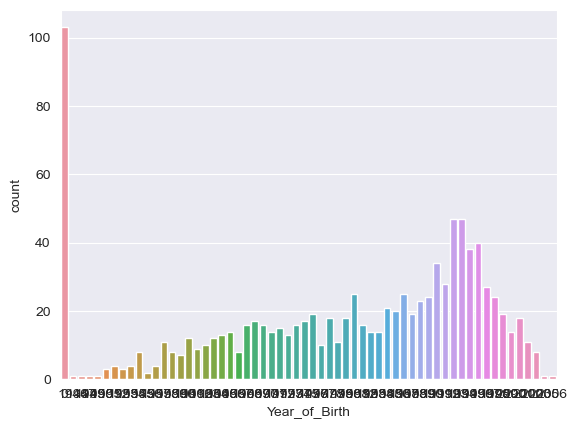

In [124]:
sns.countplot(data=final, x='Year_of_Birth')
plt.show()

# Decision Tree Classification

In [125]:
median_of_Year_of_Birth = int(final['Year_of_Birth'].median())
print(median_of_Year_of_Birth)

Train = final[final['Marital_Status'].notna()]
print(Train.shape)
Train = Train[Train['Year_of_Birth'] > 0]
print(Train.shape)
Train = Train.reset_index(drop=True)

Test = final[final['Marital_Status'].isna()]
print((Test['Year_of_Birth'] == 0).sum())
Test.loc[Test['Year_of_Birth'] == 0, 'Year_of_Birth'] = median_of_Year_of_Birth
Test = Test.reset_index(drop=True)

display(Test.head())
display(Train.head())

1984
(930, 149)
(836, 149)
9


,Employee_No,Marital_Status,Year_of_Birth,Date_Joined_Days,Title_Miss,Title_Mr,Title_Ms,Gender_Female,Gender_Male,Status_Active,...,Designation_Trainee Engineer,Designation_Trainee Purchasing Officer,Designation_Trainee QS,Designation_Trainee Safety Officer,Designation_Trainee Technical Officer,Designation_Transport Assistant,Designation_Transport Officer,Designation_Unskilled Labor,Designation_Wacher,Designation_Welder
0,405,NaN,1984,16229.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,415,NaN,1982,16586.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,423,NaN,1987,16932.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,480,NaN,1989,17352.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,508,NaN,1984,17417.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Employee_No,Marital_Status,Year_of_Birth,Date_Joined_Days,Title_Miss,Title_Mr,Title_Ms,Gender_Female,Gender_Male,Status_Active,...,Designation_Trainee Engineer,Designation_Trainee Purchasing Officer,Designation_Trainee QS,Designation_Trainee Safety Officer,Designation_Trainee Technical Officer,Designation_Transport Assistant,Designation_Transport Officer,Designation_Unskilled Labor,Designation_Wacher,Designation_Welder
0,347,0.0,1965,8741.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,348,0.0,1973,9202.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,349,0.0,1974,6599.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,351,0.0,1974,10864.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,352,0.0,1980,11347.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
random_param = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [2, 3, 5, 10, 15, 20, 30, 50, 100, 200, None],
    'min_samples_split': [1, 2],
    'min_samples_leaf': [1, 2, 3, 5, 10, 20, 30, 40, 50, 100],
    'max_features': [1, 2, 3, 5, 10, 20, 30, 40, 50, 60, 70, 80, 85, 90, 95, 100, None],
    'max_leaf_nodes': [2, 5, 10, 20, 30, 50, 100, 1000, 2000, None]
}

clf = DecisionTreeClassifier()
rscv = RandomizedSearchCV(estimator=clf, n_iter=30000, param_distributions=random_param, scoring='accuracy', cv=5, n_jobs=2, error_score='raise', verbose=3)
rscv.fit(Train.loc[:, ~Train.columns.isin(['Employee_No', 'Marital_Status'])], Train['Marital_Status'])

Fitting 5 folds for each of 30000 candidates, totalling 150000 fits


RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=DecisionTreeClassifier(), n_iter=30000, n_jobs=2,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, 3, 5, 10, 15, 20, 30,
                                                      50, 100, 200, None],
                                        'max_features': [1, 2, 3, 5, 10, 20, 30,
                                                         40, 50, 60, 70, 80, 85,
                                                         90, 95, 100, None],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 50,
                                                           100, 1000, 2000,
                                                           None],
                                        'min_samples_leaf': [1, 2, 3, 5, 10, 20,
                                                             30, 40, 50, 100],
                                        'min_samples_split': [1, 2]},
                   scoring='accuracy', verbose=3)

In [127]:
print(rscv.best_score_)
print(rscv.best_params_)

0.8637082976903336
{'min_samples_split': 1, 'min_samples_leaf': 10, 'max_leaf_nodes': 30, 'max_features': 60, 'max_depth': 20, 'criterion': 'gini'}


For 'Marital_Status' with using only the employee.csv for inference,
The best decision tree params are : {'min_samples_split': 1, 'min_samples_leaf': 10, 'max_leaf_nodes': 30, 'max_features': 60, 'max_depth': 20, 'criterion': 'gini'}
The cross-validation accuracy score is: 0.8637082976903336

In [128]:
dtc = DecisionTreeClassifier(min_samples_split=1, min_samples_leaf=10, max_leaf_nodes=30, max_features=60, max_depth=20, criterion='gini')
dtc.fit(Train.loc[:, ~Train.columns.isin(['Employee_No', 'Marital_Status'])], Train['Marital_Status'])
predicted = dtc.predict(Test.loc[:, ~Test.columns.isin(['Employee_No', 'Marital_Status'])])
print(predicted)

Test['Marital_Status'] = predicted

display(Test.head())
print(Test.isna().sum())

[0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0.]


,Employee_No,Marital_Status,Year_of_Birth,Date_Joined_Days,Title_Miss,Title_Mr,Title_Ms,Gender_Female,Gender_Male,Status_Active,...,Designation_Trainee Engineer,Designation_Trainee Purchasing Officer,Designation_Trainee QS,Designation_Trainee Safety Officer,Designation_Trainee Technical Officer,Designation_Transport Assistant,Designation_Transport Officer,Designation_Unskilled Labor,Designation_Wacher,Designation_Welder
0,405,0.0,1984,16229.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,415,0.0,1982,16586.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,423,0.0,1987,16932.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,480,1.0,1989,17352.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,508,0.0,1984,17417.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Employee_No                        0
Marital_Status                     0
Year_of_Birth                      0
Date_Joined_Days                   0
Title_Miss                         0
                                  ..
Designation_Transport Assistant    0
Designation_Transport Officer      0
Designation_Unskilled Labor        0
Designation_Wacher                 0
Designation_Welder                 0
Length: 149, dtype: int64


In [129]:
count = 0
for index, row in Test.iterrows():
    series = final.loc[final['Employee_No'] == row['Employee_No'], 'Marital_Status']
    if series.size == 1:
        final.loc[final['Employee_No'] == row['Employee_No'], 'Marital_Status'] = row['Marital_Status']
        count = count + 1

print('Totally updated: ', str(count))
display(final.isna().sum())
display(final.head())
print(final.shape)

Totally updated:  67


Employee_No                        0
Marital_Status                     0
Year_of_Birth                      0
Date_Joined_Days                   0
Title_Miss                         0
                                  ..
Designation_Transport Assistant    0
Designation_Transport Officer      0
Designation_Unskilled Labor        0
Designation_Wacher                 0
Designation_Welder                 0
Length: 149, dtype: int64

,Employee_No,Marital_Status,Year_of_Birth,Date_Joined_Days,Title_Miss,Title_Mr,Title_Ms,Gender_Female,Gender_Male,Status_Active,...,Designation_Trainee Engineer,Designation_Trainee Purchasing Officer,Designation_Trainee QS,Designation_Trainee Safety Officer,Designation_Trainee Technical Officer,Designation_Transport Assistant,Designation_Transport Officer,Designation_Unskilled Labor,Designation_Wacher,Designation_Welder
0,347,0.0,1965,8741.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,348,0.0,1973,9202.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,349,0.0,1974,6599.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,351,0.0,1974,10864.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,352,0.0,1980,11347.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(997, 149)


# Imputing 'Year_of_Birth' in employee.csv

In [130]:
print((final['Year_of_Birth'] == 0).sum())
print((final[final['Year_of_Birth'] > 0])['Year_of_Birth'].min())
print(final['Year_of_Birth'].max())
print(final['Year_of_Birth'].nunique() - 1)

103
1946
2006
59


In [131]:
final['Year_of_Birth'] = final['Year_of_Birth'].astype('float64')
final.dtypes

Employee_No                          int64
Marital_Status                     float64
Year_of_Birth                      float64
Date_Joined_Days                   float64
Title_Miss                         float64
                                    ...   
Designation_Transport Assistant    float64
Designation_Transport Officer      float64
Designation_Unskilled Labor        float64
Designation_Wacher                 float64
Designation_Welder                 float64
Length: 149, dtype: object

# Decision Tree Regression

In [132]:
Train = final[final['Year_of_Birth'] > 0]
print(Train.shape)
Train = Train.reset_index(drop=True)

Test = final[final['Year_of_Birth'] <= 0]
print(Test.shape)
Test = Test.reset_index(drop=True)

display(Test.head())
display(Train.head())

(894, 149)
(103, 149)


,Employee_No,Marital_Status,Year_of_Birth,Date_Joined_Days,Title_Miss,Title_Mr,Title_Ms,Gender_Female,Gender_Male,Status_Active,...,Designation_Trainee Engineer,Designation_Trainee Purchasing Officer,Designation_Trainee QS,Designation_Trainee Safety Officer,Designation_Trainee Technical Officer,Designation_Transport Assistant,Designation_Transport Officer,Designation_Unskilled Labor,Designation_Wacher,Designation_Welder
0,405,0.0,0.0,16229.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,411,0.0,0.0,16552.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,455,1.0,0.0,17251.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,456,0.0,0.0,17896.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,461,0.0,0.0,17896.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,Employee_No,Marital_Status,Year_of_Birth,Date_Joined_Days,Title_Miss,Title_Mr,Title_Ms,Gender_Female,Gender_Male,Status_Active,...,Designation_Trainee Engineer,Designation_Trainee Purchasing Officer,Designation_Trainee QS,Designation_Trainee Safety Officer,Designation_Trainee Technical Officer,Designation_Transport Assistant,Designation_Transport Officer,Designation_Unskilled Labor,Designation_Wacher,Designation_Welder
0,347,0.0,1965.0,8741.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,348,0.0,1973.0,9202.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,349,0.0,1974.0,6599.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,351,0.0,1974.0,10864.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,352,0.0,1980.0,11347.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
print(metrics.get_scorer_names())

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weight

In [134]:
random_param = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [2, 3, 5, 10, 15, 20, 30, 50, 100, 200, None],
    'min_samples_split': [1, 2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 5, 10, 20, 30, 40, 50, 100],
    'max_features': [1, 2, 3, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_leaf_nodes': [2, 5, 10, 20, 30, 50, 100, 1000, 2000, None]
}

reg = DecisionTreeRegressor()
rscv = RandomizedSearchCV(estimator=reg, n_iter=30000, param_distributions=random_param, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1, error_score='raise', verbose=3)
rscv.fit(Train.loc[:, ~Train.columns.isin(['Employee_No', 'Year_of_Birth'])], Train['Year_of_Birth'])

Fitting 5 folds for each of 30000 candidates, totalling 150000 fits


RandomizedSearchCV(cv=5, error_score='raise', estimator=DecisionTreeRegressor(),
                   n_iter=30000, n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [2, 3, 5, 10, 15, 20, 30,
                                                      50, 100, 200, None],
                                        'max_features': [1, 2, 3, 5, 10, 20, 30,
                                                         40, 50, 60, 70, 80, 90,
                                                         100, None],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 50,
                                                           100, 1000, 2000,
                                                           None],
                                        'min_samples_leaf': [1, 2, 3, 5, 10, 20,
                                                             30, 40, 50, 100],
                                        'min_samples_split': [1, 2, 3, 4]},
                   scoring='neg_root_mean_squared_error', verbose=3)

In [135]:
print(rscv.best_score_)
print(rscv.best_params_)

-10.16914022430108
{'min_samples_split': 2, 'min_samples_leaf': 2, 'max_leaf_nodes': None, 'max_features': 70, 'max_depth': 5, 'criterion': 'squared_error'}


-10.16914022430108
{'min_samples_split': 2, 'min_samples_leaf': 2, 'max_leaf_nodes': None, 'max_features': 70, 'max_depth': 5, 'criterion': 'squared_error'}

In [136]:
dtc = DecisionTreeRegressor(min_samples_split=2, min_samples_leaf=2, max_leaf_nodes=None, max_features=70, max_depth=5, criterion='squared_error')
dtc.fit(Train.loc[:, ~Train.columns.isin(['Employee_No', 'Year_of_Birth'])], Train['Year_of_Birth'])
predicted = dtc.predict(Test.loc[:, ~Test.columns.isin(['Employee_No', 'Year_of_Birth'])])
print(predicted)

Test['Year_of_Birth'] = np.round(predicted)

display(Test.head())
print(Test.isna().sum())

[1980.15425532 1980.15425532 1992.68918919 1979.42307692 1979.42307692
 1983.74074074 1979.42307692 1980.15425532 1979.42307692 1979.42307692
 1980.15425532 1980.15425532 1980.15425532 1992.68918919 1980.15425532
 1980.15425532 1979.42307692 1979.42307692 1979.42307692 1983.74074074
 1979.42307692 1979.42307692 1983.74074074 1983.74074074 1983.74074074
 1983.74074074 1983.74074074 1983.74074074 1983.74074074 1979.42307692
 1979.42307692 1983.74074074 1979.42307692 1983.74074074 1983.74074074
 1983.74074074 1983.74074074 1983.74074074 1983.74074074 1952.33333333
 1952.33333333 1979.42307692 1979.42307692 1979.42307692 1992.68918919
 1979.42307692 1979.42307692 1979.42307692 1979.42307692 1979.42307692
 1979.42307692 1979.42307692 1979.42307692 1979.42307692 1979.42307692
 1979.42307692 1979.42307692 1979.42307692 1992.68918919 1992.68918919
 1979.42307692 1979.42307692 1992.68918919 1979.42307692 1952.33333333
 1979.42307692 1979.42307692 1980.15425532 1980.15425532 1983.74074074
 1983.

,Employee_No,Marital_Status,Year_of_Birth,Date_Joined_Days,Title_Miss,Title_Mr,Title_Ms,Gender_Female,Gender_Male,Status_Active,...,Designation_Trainee Engineer,Designation_Trainee Purchasing Officer,Designation_Trainee QS,Designation_Trainee Safety Officer,Designation_Trainee Technical Officer,Designation_Transport Assistant,Designation_Transport Officer,Designation_Unskilled Labor,Designation_Wacher,Designation_Welder
0,405,0.0,1980.0,16229.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,411,0.0,1980.0,16552.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,455,1.0,1993.0,17251.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,456,0.0,1979.0,17896.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,461,0.0,1979.0,17896.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Employee_No                        0
Marital_Status                     0
Year_of_Birth                      0
Date_Joined_Days                   0
Title_Miss                         0
                                  ..
Designation_Transport Assistant    0
Designation_Transport Officer      0
Designation_Unskilled Labor        0
Designation_Wacher                 0
Designation_Welder                 0
Length: 149, dtype: int64


In [137]:
count = 0
for index, row in Test.iterrows():
    series = final.loc[final['Employee_No'] == row['Employee_No'], 'Year_of_Birth']
    if series.size == 1:
        final.loc[final['Employee_No'] == row['Employee_No'], 'Year_of_Birth'] = row['Year_of_Birth']
        count = count + 1

print('Totally updated: ', str(count))
display(final.isna().sum())
display(final.head())
print(final.shape)

Totally updated:  103


Employee_No                        0
Marital_Status                     0
Year_of_Birth                      0
Date_Joined_Days                   0
Title_Miss                         0
                                  ..
Designation_Transport Assistant    0
Designation_Transport Officer      0
Designation_Unskilled Labor        0
Designation_Wacher                 0
Designation_Welder                 0
Length: 149, dtype: int64

,Employee_No,Marital_Status,Year_of_Birth,Date_Joined_Days,Title_Miss,Title_Mr,Title_Ms,Gender_Female,Gender_Male,Status_Active,...,Designation_Trainee Engineer,Designation_Trainee Purchasing Officer,Designation_Trainee QS,Designation_Trainee Safety Officer,Designation_Trainee Technical Officer,Designation_Transport Assistant,Designation_Transport Officer,Designation_Unskilled Labor,Designation_Wacher,Designation_Welder
0,347,0.0,1965.0,8741.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,348,0.0,1973.0,9202.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,349,0.0,1974.0,6599.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,351,0.0,1974.0,10864.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,352,0.0,1980.0,11347.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(997, 149)


# Neural Network Regression

In [62]:
_final = final.copy()
_final = _final.drop(['Gender_Female', 'Status_Active'],axis=1)

Train = _final[_final['Year_of_Birth'] > 0]
print(Train.shape)
Train = Train.reset_index(drop=True)

scaler = StandardScaler()
scaling_df = Train.loc[:, ~Train.columns.isin(['Employee_No'])]
columns_scaling = scaling_df.columns
scaled = scaler.fit_transform(scaling_df)
print(scaled)
df_scaled = pd.DataFrame(scaled, columns=[columns_scaling])

Train[columns_scaling] = df_scaled[columns_scaling]

display(Train.head())

Test = _final[_final['Year_of_Birth'] <= 0]
print(Test.shape)
Test = Test.reset_index(drop=True)

scaling_df = Test.loc[:, ~Test.columns.isin(['Employee_No'])]
columns_scaling = scaling_df.columns
scaled = scaler.transform(scaling_df)
print(scaled)
df_scaled = pd.DataFrame(scaled, columns=[columns_scaling])

Test[columns_scaling] = df_scaled[columns_scaling]

display(Test.head())

(894, 147)
[[-0.73397979 -1.38276941 -7.72468025 ... -0.70710678 -0.05802589
  -0.04735137]
 [-0.73397979 -0.77533947 -7.35083684 ... -0.70710678 -0.05802589
  -0.04735137]
 [-0.73397979 -0.69941073 -9.46171406 ... -0.70710678 -0.05802589
  -0.04735137]
 ...
 [ 1.36243533  1.04695034  0.862365   ... -0.70710678 -0.05802589
  -0.04735137]
 [ 1.36243533  0.51544915  0.86479782 ... -0.70710678 -0.05802589
  -0.04735137]
 [-0.73397979 -0.31976702  0.87452911 ... -0.70710678 -0.05802589
  -0.04735137]]


,Employee_No,Marital_Status,Year_of_Birth,Date_Joined_Days,Title_Miss,Title_Mr,Title_Ms,Gender_Male,Status_Inactive,Employment_Category_Labour,...,Designation_Trainee Engineer,Designation_Trainee Purchasing Officer,Designation_Trainee QS,Designation_Trainee Safety Officer,Designation_Trainee Technical Officer,Designation_Transport Assistant,Designation_Transport Officer,Designation_Unskilled Labor,Designation_Wacher,Designation_Welder
0,347,-0.73398,-1.382769,-7.724680,-0.095023,0.282330,-0.263397,0.265817,-1.799157,-1.079189,...,-0.047351,-0.047351,-0.06704,-0.033464,-0.033464,-0.033464,-0.033464,-0.707107,-0.058026,-0.047351
1,348,-0.73398,-0.775339,-7.350837,-0.095023,0.282330,-0.263397,0.265817,-1.799157,-1.079189,...,-0.047351,-0.047351,-0.06704,-0.033464,-0.033464,-0.033464,-0.033464,-0.707107,-0.058026,-0.047351
2,349,-0.73398,-0.699411,-9.461714,-0.095023,0.282330,-0.263397,0.265817,0.555816,-1.079189,...,-0.047351,-0.047351,-0.06704,-0.033464,-0.033464,-0.033464,-0.033464,-0.707107,-0.058026,-0.047351
3,351,-0.73398,-0.699411,-6.003054,-0.095023,-3.541956,3.796550,-3.761986,0.555816,-1.079189,...,-0.047351,-0.047351,-0.06704,-0.033464,-0.033464,-0.033464,-0.033464,-0.707107,-0.058026,-0.047351
4,352,-0.73398,-0.243838,-5.611370,-0.095023,0.282330,-0.263397,0.265817,-1.799157,-1.079189,...,-0.047351,-0.047351,-0.06704,-0.033464,-0.033464,-0.033464,-0.033464,-0.707107,-0.058026,-0.047351


(103, 147)
[[-7.33979791e-01 -1.50582748e+02 -1.65236040e+00 ... -7.07106781e-01
  -5.80258853e-02 -4.73513724e-02]
 [-7.33979791e-01 -1.50582748e+02 -1.39042673e+00 ... -7.07106781e-01
  -5.80258853e-02 -4.73513724e-02]
 [ 1.36243533e+00 -1.50582748e+02 -8.23579569e-01 ... -7.07106781e-01
  -5.80258853e-02 -4.73513724e-02]
 ...
 [ 1.36243533e+00 -1.50582748e+02  7.05042615e-01 ...  1.41421356e+00
  -5.80258853e-02 -4.73513724e-02]
 [-7.33979791e-01 -1.50582748e+02  7.26127059e-01 ... -7.07106781e-01
  -5.80258853e-02 -4.73513724e-02]
 [-7.33979791e-01 -1.50582748e+02  7.82892870e-01 ...  1.41421356e+00
  -5.80258853e-02 -4.73513724e-02]]


,Employee_No,Marital_Status,Year_of_Birth,Date_Joined_Days,Title_Miss,Title_Mr,Title_Ms,Gender_Male,Status_Inactive,Employment_Category_Labour,...,Designation_Trainee Engineer,Designation_Trainee Purchasing Officer,Designation_Trainee QS,Designation_Trainee Safety Officer,Designation_Trainee Technical Officer,Designation_Transport Assistant,Designation_Transport Officer,Designation_Unskilled Labor,Designation_Wacher,Designation_Welder
0,405,-0.733980,-150.582748,-1.652360,-0.095023,0.28233,-0.263397,0.265817,0.555816,-1.079189,...,-0.047351,-0.047351,-0.06704,-0.033464,-0.033464,-0.033464,-0.033464,-0.707107,-0.058026,-0.047351
1,411,-0.733980,-150.582748,-1.390427,-0.095023,0.28233,-0.263397,0.265817,-1.799157,-1.079189,...,-0.047351,-0.047351,-0.06704,-0.033464,-0.033464,-0.033464,-0.033464,-0.707107,-0.058026,-0.047351
2,455,1.362435,-150.582748,-0.823580,-0.095023,0.28233,-0.263397,0.265817,0.555816,-1.079189,...,-0.047351,-0.047351,-0.06704,-0.033464,-0.033464,-0.033464,-0.033464,-0.707107,-0.058026,-0.047351
3,456,-0.733980,-150.582748,-0.300523,-0.095023,0.28233,-0.263397,0.265817,0.555816,0.926622,...,-0.047351,-0.047351,-0.06704,-0.033464,-0.033464,-0.033464,-0.033464,-0.707107,-0.058026,-0.047351
4,461,-0.733980,-150.582748,-0.300523,-0.095023,0.28233,-0.263397,0.265817,0.555816,0.926622,...,-0.047351,-0.047351,-0.06704,-0.033464,-0.033464,-0.033464,-0.033464,-0.707107,-0.058026,-0.047351


In [63]:
# 'hidden_layer_sizes': [2000],
# 'activation': ['identity', 'logistic', 'tanh', 'relu'],
# 'solver': ['lbfgs', 'sgd', 'adam'],
# 'learning_rate': ['constant', 'invscaling', 'adaptive'],
# 'learning_rate_init': [0.001],
# 'max_iter': [1000, 2000],
# 'tol': [1e-5, 1e-4],

neural_params = {
    'hidden_layer_sizes': [2000],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'learning_rate': ['adaptive'],
    'learning_rate_init': [0.001],
    'max_iter': [2000],
    'tol': [1e-5],
}

reg = MLPRegressor()
rscv = RandomizedSearchCV(estimator=reg, n_iter=12, param_distributions=neural_params, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1, error_score='raise', verbose=3)
rscv.fit(Train.loc[:, ~Train.columns.isin(['Employee_No', 'Year_of_Birth'])], Train['Year_of_Birth'])

Fitting 5 folds for each of 12 candidates, totalling 60 fits


RandomizedSearchCV(cv=5, error_score='raise', estimator=MLPRegressor(),
                   n_iter=12, n_jobs=-1,
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                                        'hidden_layer_sizes': [2000],
                                        'learning_rate': ['adaptive'],
                                        'learning_rate_init': [0.001],
                                        'max_iter': [2000],
                                        'solver': ['lbfgs', 'sgd', 'adam'],
                                        'tol': [1e-05]},
                   scoring='neg_root_mean_squared_error', verbose=3)

In [67]:
print(rscv.best_score_)
print(rscv.best_params_)

-0.7731691423247758
{'tol': 1e-05, 'solver': 'sgd', 'max_iter': 2000, 'learning_rate_init': 0.001, 'learning_rate': 'adaptive', 'hidden_layer_sizes': 2000, 'activation': 'logistic'}


In [77]:
X_train, X_test, Y_train, Y_test = train_test_split(Train.loc[:, ~Train.columns.isin(['Employee_No', 'Year_of_Birth'])], Train['Year_of_Birth'], test_size=0.2, random_state=42)
reg = MLPRegressor(tol=1e-5, solver='sgd', max_iter=2000, learning_rate_init=0.001, learning_rate='adaptive', hidden_layer_sizes=2000, activation='logistic')
reg.fit(X_train, Y_train)
predicted = reg.predict(X_test)
print(predicted)

print(mean_squared_error(Y_test, predicted, squared=False))

[-0.30851836 -0.26531885 -0.13016024 -0.26990591  0.61292441 -0.282948
 -0.99753064  0.79133211  0.90573007  1.02996835 -0.40866673 -0.35984087
  0.72998491 -0.40951909 -0.93308456  0.96752288 -0.64289195  0.43145895
  1.14084277  1.20721493 -0.38112811 -0.59300887 -0.15758977 -0.22555581
  0.67889921  0.99760471 -0.10913275 -0.53523781  0.8657224   0.5453916
 -0.36594365  1.02858981  0.69008917  0.89693915 -0.41418235  1.09015881
 -0.12570013 -0.38138355 -0.19180062 -0.358969    0.72289953  0.74644168
 -1.02209251  0.26056314 -0.38768383 -0.30373133 -0.41418235 -0.69668734
 -1.61095568 -0.18526883 -0.56489961 -0.3556866  -0.36507365 -0.35604562
  0.69940446 -0.36481544 -0.71351281 -0.29915714 -0.41259382  0.63315226
 -0.37794262 -0.24042741 -0.37512253 -0.15661683 -1.38630768  1.08763217
 -0.4001278  -0.77132491  0.70559905  0.20183308 -0.39644966 -1.93025142
 -0.02013276 -0.35460953  0.72955811  0.81798235  0.29701667 -0.35784069
 -0.40331789 -0.37576181  0.47943125 -0.41418235 -0.39

In [66]:
count = 0
for index, row in Test.iterrows():
    series = final.loc[final['Employee_No'] == row['Employee_No'], 'Year_of_Birth']
    if series.size == 1:
        final.loc[final['Employee_No'] == row['Employee_No'], 'Year_of_Birth'] = row['Year_of_Birth']
        count = count + 1

print('Totally updated: ', str(count))
display(final.isna().sum())
display(final.head())
print(final.shape)

Totally updated:  103


Employee_No                        0
Marital_Status                     0
Year_of_Birth                      0
Date_Joined_Days                   0
Title_Miss                         0
                                  ..
Designation_Transport Assistant    0
Designation_Transport Officer      0
Designation_Unskilled Labor        0
Designation_Wacher                 0
Designation_Welder                 0
Length: 149, dtype: int64

,Employee_No,Marital_Status,Year_of_Birth,Date_Joined_Days,Title_Miss,Title_Mr,Title_Ms,Gender_Female,Gender_Male,Status_Active,...,Designation_Trainee Engineer,Designation_Trainee Purchasing Officer,Designation_Trainee QS,Designation_Trainee Safety Officer,Designation_Trainee Technical Officer,Designation_Transport Assistant,Designation_Transport Officer,Designation_Unskilled Labor,Designation_Wacher,Designation_Welder
0,347,0.0,1965.0,8741.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,348,0.0,1973.0,9202.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,349,0.0,1974.0,6599.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,351,0.0,1974.0,10864.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,352,0.0,1980.0,11347.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(997, 149)


<Axes: >

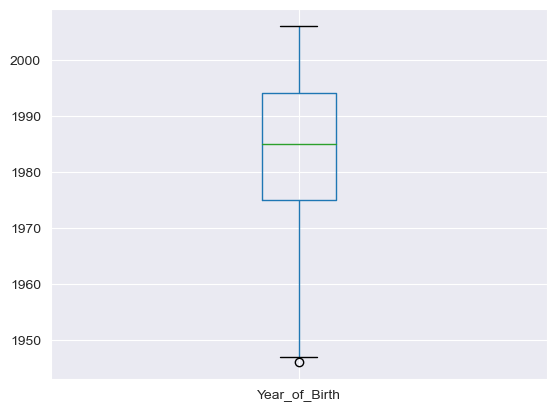

In [138]:
final.boxplot(column=['Year_of_Birth'])

<Axes: >

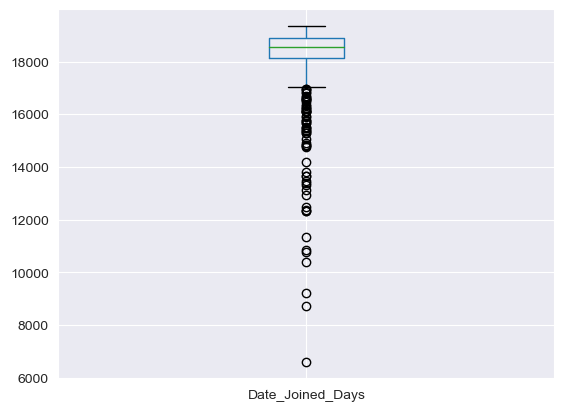

In [139]:
final.boxplot(column=['Date_Joined_Days'])

# Finalize imputing the 'Marital_Status' and 'Year_of_Birth'

In [140]:
final.head()

,Employee_No,Marital_Status,Year_of_Birth,Date_Joined_Days,Title_Miss,Title_Mr,Title_Ms,Gender_Female,Gender_Male,Status_Active,...,Designation_Trainee Engineer,Designation_Trainee Purchasing Officer,Designation_Trainee QS,Designation_Trainee Safety Officer,Designation_Trainee Technical Officer,Designation_Transport Assistant,Designation_Transport Officer,Designation_Unskilled Labor,Designation_Wacher,Designation_Welder
0,347,0.0,1965.0,8741.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,348,0.0,1973.0,9202.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,349,0.0,1974.0,6599.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,351,0.0,1974.0,10864.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,352,0.0,1980.0,11347.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [141]:
le = LabelEncoders['Marital_Status']
_array = final['Marital_Status'].astype('int64')
_array = _array.to_numpy()
result = le.inverse_transform(_array)

chatterbox['Marital_Status'] = result

final['Year_of_Birth'] = final['Year_of_Birth'].astype('int64')
final['Year_of_Birth'] = final['Year_of_Birth'].astype('object')

chatterbox['Year_of_Birth'] = final['Year_of_Birth']

display(chatterbox.head())

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth
0,347,6,Myrl Bechtelar MD,Mr,Male,1,Married,24,12/8/1993,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1965
1,348,33,Francis Mraz,Mr,Male,1,Married,24,3/14/1995,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1973
2,349,53,Mr Emmet Blick Jr,Mr,Male,1,Married,23,1/27/1988,6/28/2021,Inactive,6/28/2021,\N,\N,Staff,Permanant,Buddhist,Account Clerk,1974
3,351,77,Mr Nelson Braun PhD,Ms,Female,4,Married,40,10/1/1999,1/31/2022,Inactive,1/31/2022,\N,\N,Staff,Permanant,Catholic,Purchasing Officer,1974
4,352,88,Maximillian Hand,Mr,Male,1,Married,7,1/26/2001,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Store Keeper,1980


In [142]:
chatterbox.shape

(997, 19)

In [143]:
chatterbox.dtypes

Employee_No             int64
Employee_Code           int64
Name                   object
Title                  object
Gender                 object
Religion_ID             int64
Marital_Status         object
Designation_ID          int64
Date_Joined            object
Date_Resigned          object
Status                 object
Inactive_Date          object
Reporting_emp_1        object
Reporting_emp_2        object
Employment_Category    object
Employment_Type        object
Religion               object
Designation            object
Year_of_Birth          object
dtype: object

In [144]:
chatterbox.isna().sum()

Employee_No            0
Employee_Code          0
Name                   0
Title                  0
Gender                 0
Religion_ID            0
Marital_Status         0
Designation_ID         0
Date_Joined            0
Date_Resigned          0
Status                 0
Inactive_Date          0
Reporting_emp_1        0
Reporting_emp_2        0
Employment_Category    0
Employment_Type        0
Religion               0
Designation            0
Year_of_Birth          0
dtype: int64

In [145]:
chatterbox['Year_of_Birth'].unique()

array([1965, 1973, 1974, 1980, 1962, 1969, 1981, 1967, 1976, 1986, 1975,
       1984, 1963, 1990, 1961, 1982, 1991, 1978, 1994, 1989, 1960, 1993,
       1988, 1972, 1995, 1992, 1987, 1997, 1985, 1947, 1966, 1955, 1979,
       1959, 1957, 1958, 1970, 2001, 1996, 1998, 1983, 1999, 1971, 1946,
       1952, 1968, 1954, 1964, 2000, 1951, 2003, 1949, 1977, 1956, 1953,
       2005, 2002, 1950, 2006], dtype=object)

In [146]:
chatterbox['Title'].unique()

array(['Mr', 'Ms', 'Miss'], dtype=object)

In [147]:
chatterbox['Name'].unique()

array(['Myrl Bechtelar MD', 'Francis Mraz', 'Mr Emmet Blick Jr',
       'Mr Nelson Braun PhD', 'Maximillian Hand', 'Zena Nicolas',
       'Coralie Bernhard', 'Josh Roob', 'Ernest Upton',
       'Sydney Oberbrunner', 'Angeline Yundt', 'Prof Karlie Bauch III',
       'Leonel Romaguera', 'Sidney Macejkovic', 'Prof Jerod Pfeffer',
       'Ignatius Volkman DDS', 'Doyle Hettinger', 'Izaiah Berge',
       'Prof Arden Jacobs III', 'Shaylee Schroeder III', 'Raymond Bogan',
       'Kayden Rice', 'Macey Simonis', 'Jayde Witting', 'Sylvan Gislason',
       'Dr Kennedy Ryan MD', 'Tillman Greenfelder', 'Hanna Wyman',
       'Tessie Fadel', 'Orval Hessel', 'Katelin Thompson',
       'Savanna Spinka', 'Carley Bogisich', 'Jaquelin Block',
       'Garland Feeney', 'Elody Waelchi', 'Nola Grant', 'Macie Kuvalis',
       'Julie Osinski', 'Jody Stokes', 'Scottie Ratke',
       'Braulio Pagac IV', 'Jon Kuhn', 'Ally Nikolaus',
       'Jesus Dietrich Sr', 'Addie Purdy', 'Noelia Roberts DDS',
       'Isabella B

In [148]:
chatterbox['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [149]:
chatterbox['Date_Joined'].unique()

array(['12/8/1993', '3/14/1995', '1/27/1988', '10/1/1999', '1/26/2001',
       '9/29/2003', '11/10/2003', '2/16/2004', '6/1/2005', '7/1/2006',
       '8/29/2006', '11/1/2006', '5/25/2007', '11/12/2007', '11/15/2008',
       '8/2/2010', '8/5/2010', '10/26/2010', '3/24/2011', '11/3/2011',
       '11/21/2011', '1/25/2012', '1/29/2012', '3/17/2012', '5/21/2012',
       '6/5/2012', '7/6/2012', '11/18/2012', '12/14/2012', '1/24/2013',
       '2/5/2013', '4/1/2013', '6/27/2013', '8/21/2013', '1/28/2014',
       '1/24/2014', '2/25/2014', '2/22/2014', '5/3/2014', '6/4/2014',
       '6/9/2014', '9/17/2014', '10/1/2014', '2/5/2015', '4/28/2015',
       '5/1/2015', '6/2/2016', '6/1/2015', '8/24/2015', '9/1/2015',
       '1/2/2016', '2/5/2016', '5/12/2016', '5/26/2016', '8/15/2016',
       '7/3/2020', '9/15/2016', '1/1/2019', '11/1/2016', '11/28/2016',
       '12/15/2016', '12/19/2016', '1/16/2017', '1/10/2017', '1/30/2017',
       '2/16/2017', '12/3/2020', '3/1/2017', '3/23/2017', '3/27/2017',
   

In [150]:
chatterbox['Date_Resigned'].unique()

array(['\\N', '6/28/2021', '1/31/2022', '0000-00-00', '5/5/2021',
       '5/23/2021', '4/30/2021', '12/17/2021', '8/31/2021', '5/30/2021',
       '7/25/2021', '3/25/2021', '5/31/2021', '8/31/2022', '10/26/2021',
       '9/27/2022', '6/30/2021', '12/22/2021', '8/20/2021', '12/10/2020',
       '4/9/2021', '2/19/2022', '5/31/2022', '2/28/2022', '11/28/2020',
       '11/27/2021', '5/4/2022', '10/31/2021', '3/2/2021', '2/10/2022',
       '1/18/2021', '11/30/2020', '1/12/2022', '12/31/2022', '7/20/2022',
       '12/5/2020', '9/18/2021', '9/20/2021', '2/28/2021', '11/26/2021',
       '7/30/2021', '5/3/2021', '3/14/2021', '9/12/2022', '4/30/2022',
       '7/31/2021', '2/26/2022', '11/30/2021', '2/12/2021', '10/25/2021',
       '10/10/2022', '5/14/2022', '1/23/2022', '9/7/2021', '10/21/2021',
       '8/8/2021', '12/28/2020', '12/31/2020', '1/16/2021', '11/25/2020',
       '4/7/2022', '11/22/2020', '3/30/2021', '2/24/2022', '11/24/2020',
       '6/30/2022', '10/18/2021', '12/12/2020', '12/19/202

In [151]:
chatterbox['Inactive_Date'].unique()

array(['\\N', '6/28/2021', '1/31/2022', '8/31/2020', '0000-00-00',
       '5/5/2021', '5/23/2021', '9/10/2020', '5/21/2020', '4/30/2021',
       '9/27/2020', '7/28/2020', '6/30/2020', '3/30/2020', '11/14/2019',
       '12/17/2021', '8/31/2021', '8/28/2020', '12/5/2019', '6/22/2020',
       '5/30/2021', '10/6/2020', '7/25/2021', '3/25/2021', '5/31/2021',
       '8/31/2022', '10/26/2021', '9/27/2022', '6/30/2021', '12/22/2021',
       '8/20/2021', '10/31/2020', '12/10/2020', '4/9/2021', '2/29/2020',
       '2/19/2022', '3/31/2020', '9/25/2020', '6/1/2021', '5/31/2022',
       '2/28/2022', '11/28/2020', '11/27/2021', '8/30/2020', '4/3/2020',
       '5/4/2022', '12/31/2020', '10/31/2021', '3/2/2021', '5/30/2020',
       '3/13/2020', '2/10/2022', '6/12/2020', '1/25/2021', '10/21/2020',
       '11/30/2020', '1/12/2022', '2/28/2021', '8/11/2020', '5/31/2020',
       '6/19/2020', '12/27/2022', '3/10/2020', '7/17/2020', '7/20/2022',
       '12/4/2020', '12/5/2020', '6/10/2020', '9/18/2021', '9/

In [152]:
chatterbox['Status'].unique()

array(['Active', 'Inactive'], dtype=object)

In [153]:
print((chatterbox['Date_Resigned'] == '\\N').sum())
print((chatterbox['Date_Resigned'] == '0000-00-00').sum())

print((chatterbox['Inactive_Date'] == '\\N').sum())
print((chatterbox['Inactive_Date'] == '0000-00-00').sum())

print((chatterbox['Status'] == 'Inactive').sum())
print((chatterbox['Status'] == 'Active').sum())

273
183
128
105
764
233


In [154]:
df = chatterbox[chatterbox['Status'] == 'Active']
print((df['Inactive_Date'] == '\\N').sum())
print((df['Inactive_Date'] == '0000-00-00').sum())

128
105


In [155]:
chatterbox.loc[chatterbox['Status'] == 'Active', 'Inactive_Date'] = '\\N'
df = chatterbox[chatterbox['Status'] == 'Active']
print((df['Inactive_Date'] == '\\N').sum())
print((df['Inactive_Date'] == '0000-00-00').sum())

233
0


In [156]:
print(chatterbox.loc[chatterbox['Inactive_Date'] == chatterbox['Date_Resigned'], 'Status'].size)

663


In [157]:
print(chatterbox.loc[(chatterbox['Inactive_Date'] != chatterbox['Date_Resigned']) & (chatterbox['Status'] == 'Inactive'), 'Status'].size)

229


In [158]:
chatterbox.loc[(chatterbox['Status'] == 'Inactive') & ((chatterbox['Date_Resigned'] == '\\N') | (chatterbox['Date_Resigned'] == '0000-00-00')) & ((chatterbox['Inactive_Date'] != '\\N') | (chatterbox['Inactive_Date'] != '0000-00-00')), 'Date_Resigned'] = chatterbox['Inactive_Date']

print((chatterbox['Date_Resigned'] == '\\N').sum())
print((chatterbox['Date_Resigned'] == '0000-00-00').sum())

print((chatterbox['Inactive_Date'] == '\\N').sum())
print((chatterbox['Inactive_Date'] == '0000-00-00').sum())

print((chatterbox['Status'] == 'Inactive').sum())
print((chatterbox['Status'] == 'Active').sum())

128
105
233
0
764
233


In [159]:
chatterbox.loc[chatterbox['Status'] == 'Active', 'Date_Resigned'] = '\\N'

print((chatterbox['Date_Resigned'] == '\\N').sum())
print((chatterbox['Date_Resigned'] == '0000-00-00').sum())

print((chatterbox['Inactive_Date'] == '\\N').sum())
print((chatterbox['Inactive_Date'] == '0000-00-00').sum())

print((chatterbox['Status'] == 'Inactive').sum())
print((chatterbox['Status'] == 'Active').sum())

233
0
233
0
764
233


In [160]:
chatterbox['Religion'].unique()

array(['Buddhist', 'Catholic', 'Hindu', 'Muslim'], dtype=object)

In [161]:
chatterbox['Employment_Category'].unique()

array(['Staff', 'Management', 'Labour'], dtype=object)

In [162]:
chatterbox['Employment_Type'].unique()

array(['Permanant', 'Contarct Basis'], dtype=object)

In [163]:
chatterbox['Designation'].unique()

array(['Driver', 'Account Clerk', 'Purchasing Officer', 'Store Keeper',
       'Technical Officer', 'Project Coordinator ', 'Electrician',
       'Transport Officer', 'Operator - JCB', 'Driver - Boom',
       'Construction Manager', 'Operator - Crane', 'Operator-Excavator',
       'Draughtsman', 'Site Engineer', 'Supervisor', 'Quantity Surveyor',
       'Junior Technical Officer', 'Driver-Tractor', 'Project Manager',
       'Operator - Loader', 'Engineer Assistant', 'Moter Mechanic',
       'Lab Technician', 'Driver - Truck Mixture', 'Office Assistant',
       'Sociologist', 'S/Skill', 'Junior Quantity Surveyor',
       'Safety Officer', 'Autocad Draughtsman ', 'Operation Executive',
       'Unskilled Labor', 'Semi Skilled Labor', 'Skilled Labor',
       'Data Entry Operator', 'Site Supervisor', 'Mason', 'Cook',
       'Design Engineer', 'IT Executive', 'Social Environment Officer',
       'Trainee QS', 'Management Trainee', 'Planning Engineer', 'Foreman',
       'Excavator Operator', 

In [164]:
display(chatterbox)

,Employee_No,Employee_Code,Name,Title,Gender,Religion_ID,Marital_Status,Designation_ID,Date_Joined,Date_Resigned,Status,Inactive_Date,Reporting_emp_1,Reporting_emp_2,Employment_Category,Employment_Type,Religion,Designation,Year_of_Birth
0,347,6,Myrl Bechtelar MD,Mr,Male,1,Married,24,12/8/1993,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1965
1,348,33,Francis Mraz,Mr,Male,1,Married,24,3/14/1995,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Driver,1973
2,349,53,Mr Emmet Blick Jr,Mr,Male,1,Married,23,1/27/1988,6/28/2021,Inactive,6/28/2021,\N,\N,Staff,Permanant,Buddhist,Account Clerk,1974
3,351,77,Mr Nelson Braun PhD,Ms,Female,4,Married,40,10/1/1999,1/31/2022,Inactive,1/31/2022,\N,\N,Staff,Permanant,Catholic,Purchasing Officer,1974
4,352,88,Maximillian Hand,Mr,Male,1,Married,7,1/26/2001,\N,Active,\N,\N,\N,Staff,Permanant,Buddhist,Store Keeper,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,2836,5434,Janis Borer Jr,Ms,Female,1,Single,17,11/1/2022,12/22/2022,Inactive,12/22/2022,\N,\N,Staff,Contarct Basis,Buddhist,Account Executive,1993
993,2890,5479,Delphia Haley,Mr,Male,1,Single,8,11/21/2022,\N,Active,\N,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1994
994,2972,5480,Lance Stanton,Mr,Male,1,Single,201,12/5/2022,\N,Active,\N,\N,\N,Staff,Contarct Basis,Buddhist,Software Developer,1997
995,2973,5481,Chauncey Reilly,Mr,Male,1,Single,8,12/8/2022,\N,Active,\N,\N,\N,Staff,Contarct Basis,Buddhist,Quantity Surveyor,1990


Employee_No             int64
Employee_Code           int64
Name                   object
Title                  object
Gender                 object
Religion_ID             int64
Marital_Status         object
Designation_ID          int64
Date_Joined            object
Date_Resigned          object
Status                 object
Inactive_Date          object
Reporting_emp_1        object
Reporting_emp_2        object
Employment_Category    object
Employment_Type        object
Religion               object
Designation            object
Year_of_Birth          object
dtype: object

In [165]:
print(chatterbox.dtypes)

Employee_No             int64
Employee_Code           int64
Name                   object
Title                  object
Gender                 object
Religion_ID             int64
Marital_Status         object
Designation_ID          int64
Date_Joined            object
Date_Resigned          object
Status                 object
Inactive_Date          object
Reporting_emp_1        object
Reporting_emp_2        object
Employment_Category    object
Employment_Type        object
Religion               object
Designation            object
Year_of_Birth          object
dtype: object


In [166]:
chatterbox.to_csv('employee_preprocess_200440C_copy.csv')

In [167]:
print(chatterbox.duplicated().any())

False


In [168]:
from pandas.util.testing import assert_frame_equal
df1 = pd.read_csv('employee_preprocess_200440C_copy.csv')
df2 = pd.read_csv('employee_preprocess_200440C.csv')

count = 0
for index, row in df1.iterrows():
    ser = df2.loc[df2['Employee_No'] == row['Employee_No'], 'Year_of_Birth']
    if ser.size != 1 or ser.iloc[0] != row['Year_of_Birth']:
        if ser.size != 1:
            print('a')
        if ser.iloc[0] != row['Year_of_Birth']:
            print(index, ser.iloc[0], row['Year_of_Birth'])
        count = count + 1
print(count)

C:\Users\vimuk\AppData\Local\Temp\ipykernel_35068\4015829403.py:1: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


40 1976 1980
44 1976 1980
73 1992 1993
74 1976 1979
77 1976 1979
79 1976 1984
87 1976 1979
95 1976 1980
103 1976 1979
104 1976 1979
121 1976 1980
123 1976 1980
139 1985 1980
141 1992 1993
160 1976 1980
211 1976 1980
263 1976 1979
271 1982 1979
272 1976 1979
273 1976 1984
274 1976 1979
275 1976 1979
283 1998 1984
292 1976 1984
317 1976 1984
319 1976 1984
320 1992 1984
325 1976 1984
326 1998 1984
327 1976 1979
328 1992 1979
332 1998 1984
337 1976 1979
338 1992 1984
339 1992 1984
340 1976 1984
341 1992 1984
342 1976 1984
343 1992 1984
344 1976 1952
368 1976 1952
378 1976 1979
380 1976 1979
383 1976 1979
388 1992 1993
396 1976 1979
397 1976 1979
401 1976 1979
402 1976 1979
403 1976 1979
404 1976 1979
419 1976 1979
431 1976 1979
432 1976 1979
433 1976 1979
434 1976 1979
435 1976 1979
450 1976 1979
456 1992 1993
457 1992 1993
460 1976 1979
462 1976 1979
469 1992 1993
473 1976 1979
478 1976 1952
486 1976 1979
487 1976 1979
527 1976 1980
570 1976 1980
585 1976 1984
586 1976 1984
594 1976 1979


In [ ]:
display()